In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import datetime as dt
import matplotlib.dates as mdates
import statsmodels.api as sm

/Users/drewkaul/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
access = pd.read_csv('access.csv')
health = pd.read_csv('health.csv')
insecurity = pd.read_csv('insecurity.csv')
price_taxes = pd.read_csv('price_taxes.csv')
socioeconomic = pd.read_csv('socioeconomic.csv')
data_county = pd.read_csv('supp_data_county.csv')
data_state = pd.read_csv('supp_data_state.csv')
var_list = pd.read_csv('var_list.csv')

In [6]:
data_county.head()

,FIPS,State,County,2010 Census Population,"Population Estimate, 2011","Population Estimate, 2012","Population Estimate, 2013","Population Estimate, 2014","Population Estimate, 2015","Population Estimate, 2016"
0,1001,Alabama,Autauga,"54,571","55,255","55,027","54,792","54,977","55,035","55,416"
1,1003,Alabama,Baldwin,"182,265","186,653","190,403","195,147","199,745","203,690","208,563"
2,1005,Alabama,Barbour,"27,457","27,326","27,132","26,938","26,763","26,270","25,965"
3,1007,Alabama,Bibb,"22,915","22,736","22,645","22,501","22,511","22,561","22,643"
4,1009,Alabama,Blount,"57,322","57,707","57,772","57,746","57,621","57,676","57,704"


In [7]:
data_county.describe()

,FIPS
count,3142.000000
mean,30383.652769
std,15162.512005
min,1001.000000
25%,18177.500000
50%,29176.000000
75%,45080.500000
max,56045.000000


In [8]:
data_county.columns

Index(['FIPS ', 'State', 'County', '2010 Census Population',
       'Population Estimate, 2011', 'Population Estimate, 2012',
       'Population Estimate, 2013', 'Population Estimate, 2014',
       'Population Estimate, 2015', 'Population Estimate, 2016'],
      dtype='object')

In [9]:
data_state.head()

,StateFIPS,State,WIC participants FY 2009,WIC participants FY 2011,"WIC participants, FY 2012","WIC participants, FY 2013","WIC participants, FY 2014","WIC participants, FY 2015",National School Lunch Program participants FY 2009,National School Lunch Program participants FY 2011,...,"Summer Food participants, FY 2014","Summer Food participants, FY 2015","State Population, 2009","State Population, 2010","State Population, 2011","State Population, 2012","State Population, 2013","State Population, 2014","State Population, 2015","State Population, 2016"
0,1.0,Alabama,"140,810","143,768","141,900","139,001","131,046","132,133","579,880","571,291",...,"42,484","49,907","4,708,708","4,785,401","4,802,740","4,817,528","4,833,722","4,849,377","4,858,979","4,863,300"
1,2.0,Alaska,"25,816","26,295","24,969","23,055","19,605","19,682","53,554","54,410",...,"6,670","5,850","698,473","714,146","722,718","730,307","735,132","736,732","738,432","741,894"
2,4.0,Arizona,"208,873","199,343","193,214","182,501","173,020","167,072","655,498","661,437",...,"23,209","16,007","6,595,778","6,413,158","6,482,505","6,551,149","6,626,624","6,731,484","6,828,065","6,931,071"
3,5.0,Arkansas,"94,107","93,461","94,293","89,777","83,289","84,220","351,950","352,818",...,"45,837","31,081","2,889,450","2,921,588","2,937,979","2,949,828","2,959,373","2,966,369","2,978,204","2,988,248"
4,6.0,California,"1,439,006","1,466,564","1,472,468","1,431,881","1,348,939","1,265,005","3,175,063","3,282,277",...,"115,937","128,051","36,961,664","37,338,198","37,691,912","37,999,878","38,332,521","38,802,500","39,144,818","39,250,017"


In [10]:
data_state.describe()

,StateFIPS
count,51.000000
mean,28.960784
std,15.832828
min,1.000000
25%,16.500000
50%,29.000000
75%,41.500000
max,56.000000


In [11]:
data_state.columns

Index(['StateFIPS', 'State', 'WIC participants FY 2009',
       'WIC participants FY 2011', 'WIC participants, FY 2012',
       'WIC participants, FY 2013', 'WIC participants, FY 2014',
       'WIC participants, FY 2015',
       'National School Lunch Program participants FY 2009',
       'National School Lunch Program participants FY 2011',
       'National School Lunch Program participants, FY 2012',
       'National School Lunch Program participants, FY 2013',
       'National School Lunch Program participants, FY 2014',
       'National School Lunch Program participants, FY 2015',
       'School Breakfast Program participants FY 2009',
       'School Breakfast Program participants FY 2011',
       'School Breakfast Program participants, FY 2012',
       'School Breakfast Program participants, FY 2013',
       'School Breakfast Program participants, FY 2014',
       'School Breakfast Program participants, FY 2015',
       'Child and Adult Care particpants FY 2009',
       'Child and

In [12]:
health.columns

Index(['FIPS', 'State', 'County', 'PCT_DIABETES_ADULTS08',
       'PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS08', 'PCT_OBESE_ADULTS13',
       'PCT_HSPA15', 'RECFAC09', 'RECFAC14', 'PCH_RECFAC_09_14', 'RECFACPTH09',
       'RECFACPTH14', 'PCH_RECFACPTH_09_14'],
      dtype='object')

In [13]:
socioeconomic.columns

Index(['FIPS', 'State', 'County', 'PCT_NHWHITE10', 'PCT_NHBLACK10',
       'PCT_HISP10', 'PCT_NHASIAN10', 'PCT_NHNA10', 'PCT_NHPI10',
       'PCT_65OLDER10', 'PCT_18YOUNGER10', 'MEDHHINC15', 'POVRATE15',
       'PERPOV10', 'CHILDPOVRATE15', 'PERCHLDPOV10', 'METRO13', 'POPLOSS10'],
      dtype='object')

In [14]:
health.head()

,FIPS,State,County,PCT_DIABETES_ADULTS08,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS08,PCT_OBESE_ADULTS13,PCT_HSPA15,RECFAC09,RECFAC14,PCH_RECFAC_09_14,RECFACPTH09,RECFACPTH14,PCH_RECFACPTH_09_14
0,1001,AL,Autauga,11.4,13.0,31.5,34.1,25.4,4,5,25.000000,0.073889,0.090261,22.156783
1,1003,AL,Baldwin,9.8,10.4,26.2,27.4,25.4,18,25,38.888889,0.100331,0.124931,24.518392
2,1005,AL,Barbour,13.6,18.4,37.6,44.4,25.4,1,0,-100.000000,0.036157,0.000000,-100.000000
3,1007,AL,Bibb,11.1,14.8,32.3,40.3,25.4,1,1,0.000000,0.043590,0.044433,1.932818
4,1009,AL,Blount,11.4,14.1,31.9,34.6,25.4,3,3,0.000000,0.052319,0.051976,-0.654897


In [15]:
#category must be string
def count_df(df, category):
    return df[category].groupby(df[category], sort = False).count()
def unique_df(df, category):
    return df[category].unique()

In [16]:
def average_row_counts(data, counts):
    temp_total = 0
    count_for_assign_list = 0
    all_averages = pd.DataFrame()
    for i in counts:
        single_group_of_rows = data[temp_total:(i + temp_total)]
        average_of_group = single_group_of_rows.mean(axis = 0)
        all_averages = all_averages.append(average_of_group, ignore_index=True)
        temp_total += i
        count_for_assign_list += 1
    return all_averages

In [17]:
state_count_health = count_df(health, 'State')
state_unique_health = unique_df(health, 'State')
state_summary_health = average_row_counts(health, state_count_health)
state_summary_health.insert(0, 'States', state_unique_health)
state_summary_health = state_summary_health.drop('FIPS', 1)

state_count_socioeconomic = count_df(socioeconomic, 'State')
state_unique_socioeconomic = unique_df(socioeconomic, 'State')
state_summary_socioeconomic = average_row_counts(socioeconomic, state_count_socioeconomic)
state_summary_socioeconomic.insert(0, 'States', state_unique_socioeconomic)
state_summary_socioeconomic = state_summary_socioeconomic.drop('FIPS', 1)

In [18]:
state_summary_health

,States,PCH_RECFACPTH_09_14,PCH_RECFAC_09_14,PCT_DIABETES_ADULTS08,PCT_DIABETES_ADULTS13,PCT_HSPA15,PCT_OBESE_ADULTS08,PCT_OBESE_ADULTS13,RECFAC09,RECFAC14,RECFACPTH09,RECFACPTH14
0,AL,-4.987303,-4.170261,13.055224,15.489552,25.4,33.619403,36.128358,5.402985,5.492537,0.047825,0.047671
1,AK,-5.400224,-4.042387,6.458333,7.017241,20.9,30.929167,31.368966,2.655172,2.896552,0.057499,0.048405
2,AZ,-16.377833,-14.097424,9.413333,11.093333,26.0,26.066667,28.773333,32.066667,34.466667,0.060661,0.044966
3,AR,-14.821250,-14.583333,11.310667,13.308000,28.6,31.322667,35.898667,2.840000,2.853333,0.050543,0.043767
4,CA,-9.008043,-6.595635,7.606897,8.774138,25.3,24.263793,24.131034,57.448276,62.172414,0.100914,0.089559
5,CO,-9.195746,-7.799650,5.621875,6.482812,NaN,18.975000,20.682812,8.828125,9.875000,0.098700,0.081921
6,CT,-3.813812,-3.660032,7.675000,8.475000,25.3,22.975000,25.587500,63.000000,67.250000,0.132493,0.128221
7,DE,3.300069,9.700340,10.166667,11.666667,24.7,29.500000,30.500000,42.000000,44.666667,0.129948,0.131503
8,DC,21.686769,35.384615,8.300000,8.100000,NaN,21.200000,22.400000,65.000000,88.000000,0.109755,0.133557
9,FL,-2.342141,2.236098,10.355224,12.034328,24.1,27.231343,29.817910,25.089552,27.492537,0.072285,0.068166


In [19]:
state_summary_socioeconomic

,States,CHILDPOVRATE15,MEDHHINC15,METRO13,PCT_18YOUNGER10,PCT_65OLDER10,PCT_HISP10,PCT_NHASIAN10,PCT_NHBLACK10,PCT_NHNA10,PCT_NHPI10,PCT_NHWHITE10,PERCHLDPOV10,PERPOV10,POPLOSS10,POVRATE15
0,AL,31.628358,39830.104478,0.432836,23.477278,15.110755,3.190245,0.571305,28.250668,0.639322,0.032018,66.101869,0.492537,0.283582,0.149254,22.007463
1,AK,18.164286,61646.178571,0.103448,25.487328,8.573574,3.704812,4.799088,1.131494,32.305072,0.436701,50.622066,0.172414,0.068966,0.142857,13.085714
2,AZ,28.833333,44016.733333,0.533333,25.306010,16.523411,29.706499,1.115570,1.646774,12.984622,0.122570,52.825171,0.466667,0.133333,0.000000,20.520000
3,AR,31.214667,38592.680000,0.266667,23.542034,16.686740,4.563118,0.619434,15.771596,0.601408,0.056076,76.993259,0.520000,0.226667,0.266667,21.162667
4,CA,22.246552,57650.931034,0.637931,23.656666,13.721435,28.472368,6.494957,3.041599,1.727157,0.256600,57.095504,0.086207,0.000000,0.000000,16.294828
5,CO,20.784375,53810.531250,0.265625,22.053596,14.399289,18.914491,1.014262,1.399733,0.883126,0.056525,76.297769,0.156250,0.046875,0.062500,14.368750
6,CT,13.137500,72445.125000,0.875000,22.126261,14.113821,9.856644,3.108733,6.225752,0.244700,0.029266,78.591912,0.000000,0.000000,0.000000,9.612500
7,DE,20.100000,58722.000000,1.000000,22.850422,15.558365,7.690499,2.425611,19.617606,0.405260,0.031994,67.485410,0.000000,0.000000,0.000000,12.866667
8,DC,28.300000,73115.000000,1.000000,16.754387,11.435328,9.098705,3.459731,50.031825,0.219702,0.035897,34.810702,1.000000,0.000000,0.000000,17.700000
9,FL,27.276119,45390.358209,0.656716,20.772485,18.073794,12.503869,1.402705,14.071483,0.448967,0.047303,69.889108,0.313433,0.059701,0.000000,18.397015


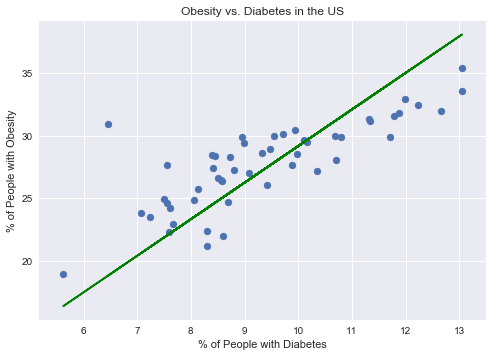

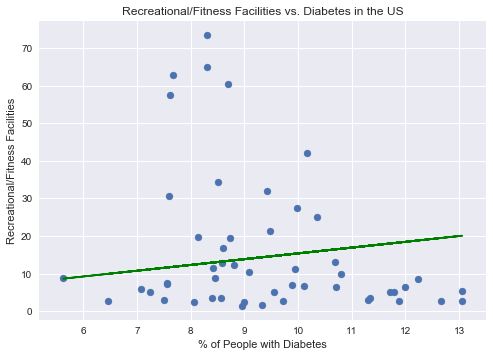

In [45]:
#Health Graphs

lst_adult_diabetes = state_summary_health.get('PCT_DIABETES_ADULTS08')
lst_adult_obesity = state_summary_health.get('PCT_OBESE_ADULTS08')
lst_recfac = state_summary_health.get('RECFAC09')

plt.figure(1)
myOLS_diabetes = sm.OLS(lst_adult_obesity,lst_adult_diabetes).fit()
plt.plot(lst_adult_diabetes, myOLS_diabetes.predict(lst_adult_diabetes), color = 'green')
plt.scatter(lst_adult_diabetes,lst_adult_obesity)
plt.title("Obesity vs. Diabetes in the US")
plt.xlabel("% of People with Diabetes")
plt.ylabel("% of People with Obesity")
plt.show()
plt.close()

# Doesn't have correlation
plt.figure(2)
myOLS_diabetes = sm.OLS(lst_recfac,lst_adult_diabetes).fit()
plt.plot(lst_adult_diabetes, myOLS_diabetes.predict(lst_adult_diabetes), color = 'green')
plt.scatter(lst_adult_diabetes,lst_recfac)
plt.title("Recreational/Fitness Facilities vs. Diabetes in the US")
plt.xlabel("% of People with Diabetes")
plt.ylabel("Recreational/Fitness Facilities")
plt.show()
plt.close()

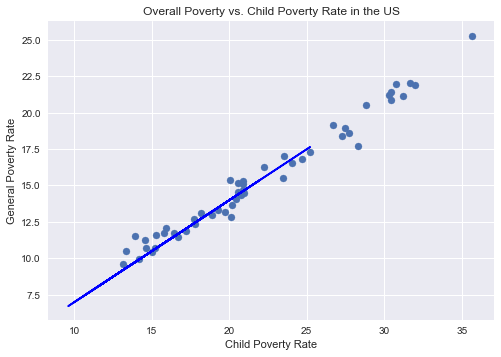

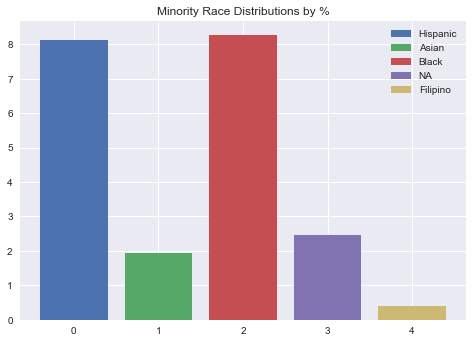

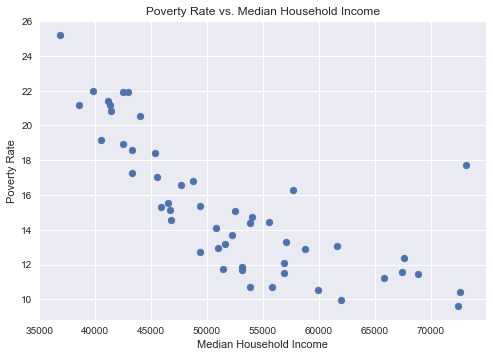

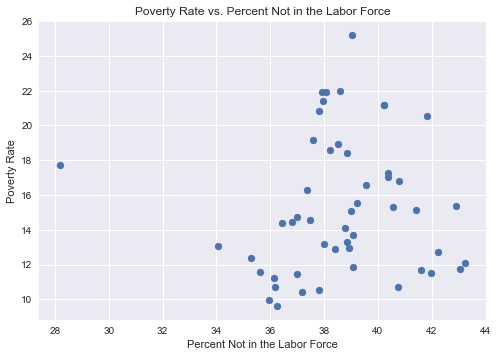

In [37]:
#Socioeconomic Graphs

lst_child_pov = state_summary_socioeconomic.get('CHILDPOVRATE15')
lst_pov_rate = state_summary_socioeconomic.get('POVRATE15')
median_income = state_summary_socioeconomic.get('MEDHHINC15')
percent_18_younger = state_summary_socioeconomic.get('PCT_18YOUNGER10')
percent_65_older = state_summary_socioeconomic.get('PCT_65OLDER10')

plt.figure(3)
myOLS_pov_rate = sm.OLS(lst_pov_rate, lst_child_pov).fit()
plt.plot(lst_pov_rate, myOLS_pov_rate.predict(lst_pov_rate), color = 'blue')
plt.scatter(lst_child_pov,lst_pov_rate)
plt.title("Overall Poverty vs. Child Poverty Rate in the US")
plt.xlabel("Child Poverty Rate")
plt.ylabel("General Poverty Rate")
plt.show()
plt.close()

#Bar Graph for Poverty by Race
lst_races = ['PCT_HISP10', 'PCT_NHASIAN10', 'PCT_NHBLACK10', 'PCT_NHNA10', 'PCT_NHPI10']
lst_names = ['Hispanic', 'Asian', 'Black', 'NA', 'Filipino']

plt.figure(4)
plt.title("Minority Race Distributions by %")
for i in range(len(lst_races)):
    race = state_summary_socioeconomic.get(lst_races[i])
    avg = sum([elem for elem in race])/len(race)
    plt.bar(i, avg, label=lst_names[i])
plt.legend()
plt.show()
plt.close()

plt.figure(5)
plt.scatter(median_income, lst_pov_rate)
plt.title("Poverty Rate vs. Median Household Income")
plt.xlabel("Median Household Income")
plt.ylabel("Poverty Rate")
plt.show()
plt.close()

plt.figure(6)
plt.scatter(percent_18_younger + percent_65_older, lst_pov_rate)
plt.title("Poverty Rate vs. Percent Not in the Labor Force")
plt.xlabel("Percent Not in the Labor Force")
plt.ylabel("Poverty Rate")
plt.show()
plt.close()

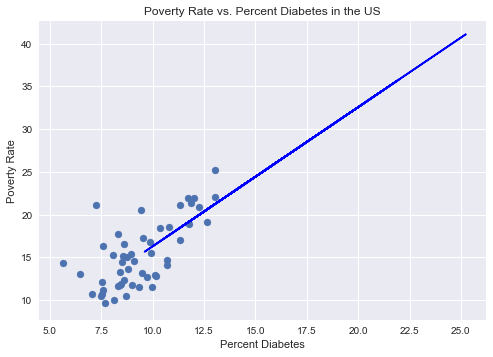

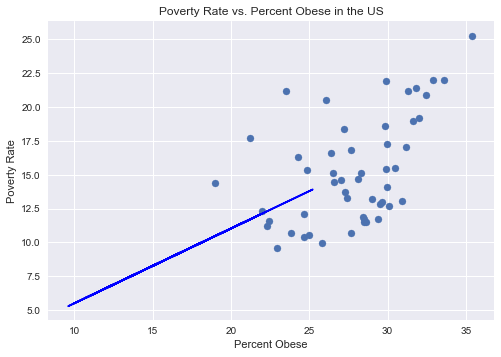

In [34]:
#Health Data vs Socioeconomic Data
plt.figure(7)
myOLS_pov_rate = sm.OLS(lst_pov_rate,lst_adult_diabetes).fit()
plt.plot(lst_pov_rate, myOLS_pov_rate.predict(lst_pov_rate), color = 'blue')
plt.scatter(lst_adult_diabetes,lst_pov_rate)
plt.title("Poverty Rate vs. Percent Diabetes in the US")
plt.xlabel("Percent Diabetes")
plt.ylabel("Poverty Rate")
plt.show()
plt.close()

plt.figure(8)
myOLS_pov_rate = sm.OLS(lst_pov_rate,lst_adult_obesity).fit()
plt.plot(lst_pov_rate, myOLS_pov_rate.predict(lst_pov_rate), color = 'blue')
plt.scatter(lst_adult_obesity,lst_pov_rate)
plt.title("Poverty Rate vs. Percent Obese in the US")
plt.xlabel("Percent Obese")
plt.ylabel("Poverty Rate")
plt.show()
plt.close()

In [30]:
#Logistic Regression

def sigmoid(X, w):
    """
    Compute the elementwise sigmoid of the product Xw
    Data in X should be rows, weights are a column. 
    """
    return 1 / (1 + np.exp(-np.dot(X, w)))

def gradient(X, y, w, onept, lamb=0):
    """
    Compute gradient of regularized loss function. 
    Accomodate for if X is just one data point. 
    """
    if onept: 
        return 2 * lamb * w - ((y - sigmoid(X, w)) * X).reshape(w.size, 1)
    return 2 * lamb * w - np.dot(X.T, y - sigmoid(X, w)) / y.size

def loss(X, y, w, lamb=0):
    """
    Compute total loss for the data in X, labels in y, params w
    """
    sumcost = 0
    for i in range(X.shape[0]):
        sumcost += y[i] * np.log(sigmoid(X[i], w)) + (1 - y[i]) * np.log(1 - sigmoid(X[i], w))
    return lamb * np.linalg.norm(w)**2 - sumcost / y.size

def accuracy(X, y, w):
    """
    Compute accuracy for data in X, labels in y, params w
    """
    results = np.round(sigmoid(X, w))
    score = sum([results[i] == y[i] for i in range(y.size)]) / y.size
    return score[0]

In [ ]:
"""Logistic Regression does not make sense in the context of our data - since all of it is 
quantitative such as percents or percent changes, we cannot use logistic regression 
to categorize our data."""